In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#Read datasets
demo = pd.read_csv('county_facts.csv')
results = pd.read_csv('primary_results.csv')

#Prelimary analysis on primary results

merge_var = ['state_abbreviation','fips']
Data = pd.merge(demo,results,left_on =merge_var,right_on=merge_var,how='inner' )

#Delete county column from data
del Data['county']
del Data['state']

#Note: Need inplace=True to modify data in place
Data.rename(columns={'state_abbreviation':'state'},inplace=True)

print('Full data has {} observation'.format(Data.shape[0]))
print('Full data has {} columns'.format(Data.shape[1]))

"""
Full data has 17479 observation
Full data has 58 columns
"""

#Seperate data Democrat and Republican
Demo = Data[Data.party=='Democrat']
Repu = Data[Data.party=='Republican']

#Calculate the average fraction vote for all the candidates in all states
Ave_vote_Demo = pd.DataFrame({'ave_vote_rate':Demo.groupby(['state','candidate']).fraction_votes.mean()}).reset_index()
Ave_vote_Repu = pd.DataFrame({'ave_vote_rate':Repu.groupby(['state','candidate']).fraction_votes.mean()}).reset_index()

"""
Find top 10 Democrat advantage group as well as top 10 Republican advantage group 
The advantage group is based on the actual vote rate between two parties. 
Note when mergeing the demo and result dataset, there are some state has all democrat counties missing all the demo records or all republican counties misssing 
all the data. I deleted the state which satisfied the situation I described above. Therefore, the ranking for advanatage party is not precisely reflected in our dataset.
Since my primary intention is to study how demo features relate to primary result, the rough ranking is still acceptable.
"""

d = {}
for state_name in Data.state:
	sub_data = Data[Data.state==state_name]
	if sub_data[sub_data.party=='Democrat'].empty or sub_data[sub_data.party=='Republican'].empty:
		continue
	else:
		advantage = float(np.sum(sub_data[sub_data.party=='Democrat'].votes) - \
		np.sum(sub_data[sub_data.party=='Republican'].votes))/np.sum(sub_data.votes)
		d[state_name] = advantage

Advantage_score = pd.DataFrame(sorted(d.items(),key=lambda x:x[1]))
Advantage_score.columns = ['state','adv_score']

Demo_Adv = Ave_vote_Demo[Ave_vote_Demo.state.isin(Advantage_score.head(10).state)]
Repu_Adv = Ave_vote_Repu[Ave_vote_Repu.state.isin(Advantage_score.tail(10).state)]

#Plot of ave_vote_rate for different candidate among the top 10 advantage state
sns.factorplot(x="state", y="ave_vote_rate", hue="candidate",data=Demo_Adv, kind="bar")
sns.factorplot(x="state",y="ave_vote_rate",hue="candidate",data=Repu_Adv,kind="bar")




Full data has 17479 observation
Full data has 58 columns


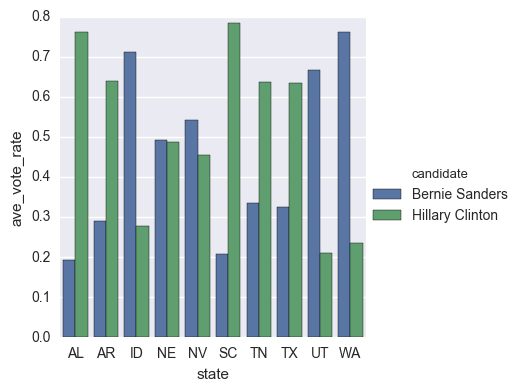

In [4]:
%matplotlib inline
sns.factorplot(x="state", y="ave_vote_rate", hue="candidate",data=Demo_Adv, kind="bar")

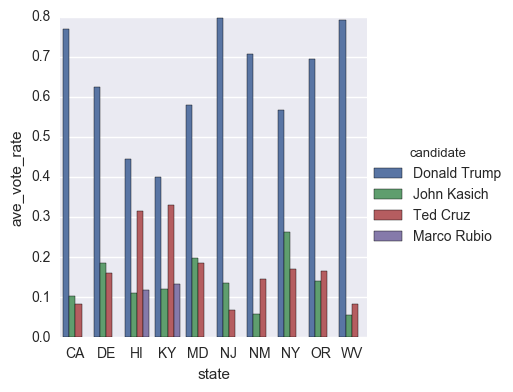

In [5]:
sns.factorplot(x="state",y="ave_vote_rate",hue="candidate",data=Repu_Adv,kind="bar")